# Mini Project: Regression with Kaggle housing dataset

This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
 
![image](https://user-images.githubusercontent.com/43855029/156053760-007e3d08-3472-47e5-ba96-c07d8d3fa325.png)

_**Project description:**_

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. 


For simpilicity: I downloaded the data for you and put it here:
https://github.com/vuminhtue/SMU_Machine_Learning_Python/tree/master/data/house-prices

## 10.1 Understand the data

There are 4 files in this folder: 
- train.csv: the trained data with 1460 rows and 81 columns. The last column "**SalePrice**" is for output with continuous value
- test.csv: the test data with 1459 rows and 80 columns. Note: There is no  "**SalePrice**" in the last column
- data_description.txt: contains informations on all columns
- sample_submission.csv: is where you save the output from model prediction and upload it to Kaggle for competition

**Objective:**
- We will use the **train.csv**__ data to create the actual train/test set and apply several algorithm to find the optimal ML algorithm to work with this data
- Once model built and trained, apply to the **test.csv**__ and create the output as in format of sample_submission.csv
- Write all analyses in ipynb format


## Step 1: Load data from Kaggle housing dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/vuminhtue/SMU_Machine_Learning_Python/master/data/house-prices/train.csv")

In [3]:
df_test = pd.read_csv("https://raw.githubusercontent.com/vuminhtue/SMU_Machine_Learning_Python/master/data/house-prices/test.csv")

## Step 2: Select variables

- First split input data to numerical and categorical
- Visualize the input data



In [4]:
df_numerical=df_train.select_dtypes(exclude=['object'])
df_categorical=df_train.select_dtypes(include=['object'])

In [5]:
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:>

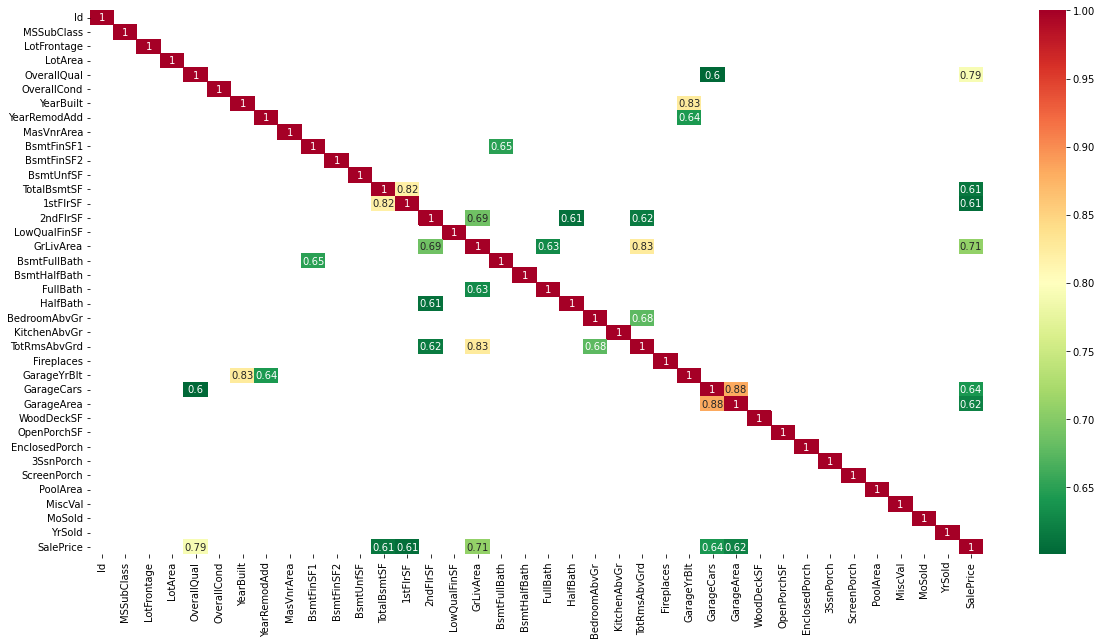

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(df_numerical.corr(), cmap='RdYlGn_r', annot=True,mask = (np.abs(df_numerical.corr()) < 0.6))


In [7]:
df_train1 = df_train[["OverallQual","TotalBsmtSF","1stFlrSF","GrLivArea","GarageCars","GarageArea","SalePrice"]]

## Step 3: Create partition for the data

In [8]:
X = df_train1.iloc[:,0:6]

In [9]:
X.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836


In [10]:
y = df_train1.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

## Step 4: Apply 1 ML algorithm to the data and calculate prediction

In [12]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)


## Step 5: Evaluate model output

In [13]:
from sklearn import metrics
print("R2 using Random Forest is: %1.2f " % metrics.r2_score(y_test,y_pred_RF)) 
print("RMSE using Random Forest is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_RF,squared=False))

R2 using Random Forest is: 0.77 
RMSE using Random Forest is: 37577.97


## Step 6: How about categorical data?
Sometime categorical data like condition also plays good contribution

In [16]:
df_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [17]:
df_categorical.shape

(1460, 43)

In [18]:
df_categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [19]:
df_categorical = df_categorical.dropna(axis=1)

In [20]:
df_categorical = pd.concat([df_categorical,df_train["SalePrice"]],axis=1)

In [21]:
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal,250000


#### Using One Hot Encoding:

In [22]:
df_categorical_ohe=pd.get_dummies(df_categorical,drop_first=True)
df_categorical_ohe.head()

,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,181500,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,223500,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,140000,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,250000,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

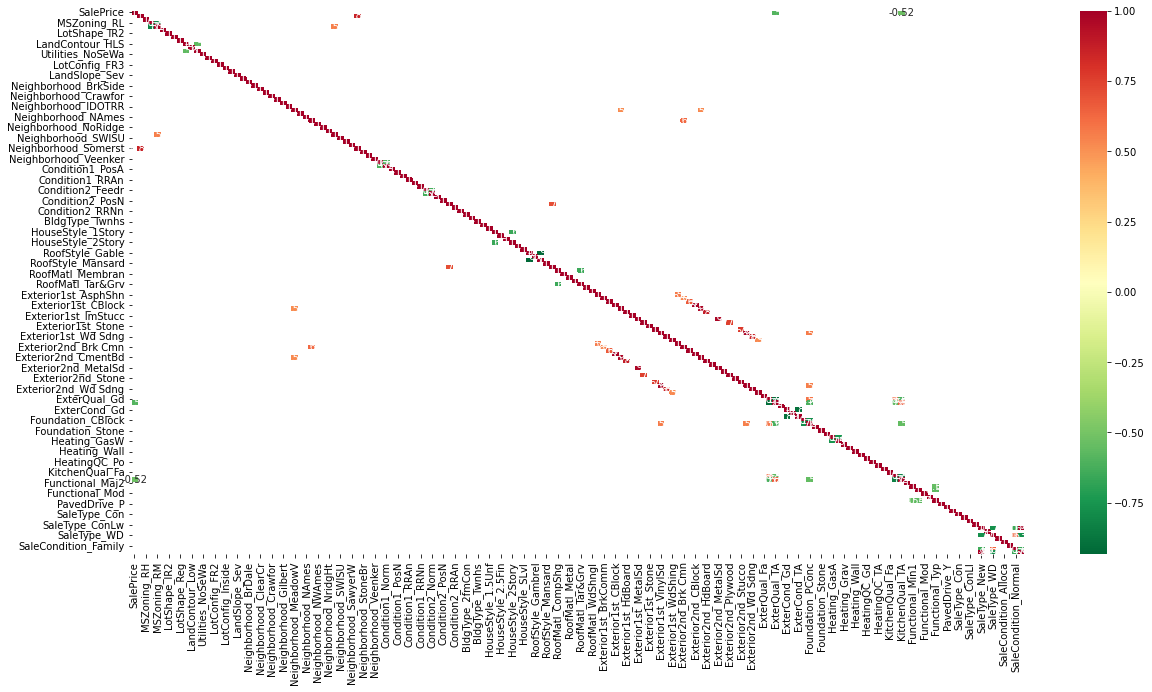

In [27]:

plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical_ohe.corr(), cmap='RdYlGn_r', annot=True,mask = (np.abs(df_categorical_ohe.corr()) <= 0.5))



In [ ]:
cate_selected = categorical1[["KitchenQual_Gd","ExterQual_TA"]]

In [ ]:
df_train2 = pd.concat([cate_selected,df_train1],axis=1)

In [ ]:
df_train1.shape

In [ ]:
y = df_train1.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)

In [ ]:
from sklearn import metrics
print("R2 using Random Forest is: %1.2f " % metrics.r2_score(y_test,y_pred_RF)) 
print("RMSE using Random Forest is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_RF,squared=False))

In [ ]:
Color = ['Red','Red','Yellow','Green','Yellow']

In [ ]:
Color_OHE = pd.get_dummies(Color,drop_first=False)

In [ ]:
Color_OHE